<h1><font color="#113D68" size=6>TINTOlib: Converting Tidy Data into Synthetic Images</font></h1>

<h1><font color="#113D68" size=5>Template Regression problem with a Hibryd Network (CNN+MLP)</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Jiayun Liu</font><br>
</div>

---

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Manuel Castillo-Cara](https://www.manuelcastillo.eu/)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Raúl García-Castro](http://www.garcia-castro.com/)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Licencia</font></h2>

<p><small><small>Improving Deep Learning by Exploiting Synthetic Images Copyright 2024 Manuel Castillo Cara.</p>
<p><small><small> Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at </p>
<p><small><small> <a href="https://www.apache.org/licenses/LICENSE-2.0">https://www.apache.org/licenses/LICENSE-2.0</a> </p>
<p><small><small> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License. </p>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section11)
    * [1.2. Citation](#section12)
    * [1.3. Documentation and License](#section13)
* [2. Libraries](#section2)
    * [2.1. System setup](#section21)
    * [2.2. Invoke the libraries](#section22)
* [3. Data processing](#section3)
    * [3.1. TINTOlib methods](#section31)
    * [3.2. Read the dataset](#section32)
    * [3.3. Generate images](#section33)
    * [3.4. Read images](#section34)
    * [3.5. Mix images and tidy data](#section35)
* [4. Pre-modelling phase](#section4)
    * [4.1. Data curation](#section41)
* [5. Modelling hybrid network](#section5)
    * [5.1. FFNN for tabular data](#section51)
    * [5.2. CNN for TINTOlib images](#section52)
    * [5.3. Concatenate branches](#section53)
    * [5.4. Metrics](#section54)
    * [5.5. Compile and fit](#section55)
* [6. Results](#section6)
    * [6.1. Train/Validation representation](#section61)
    * [6.2. Validation/Test evaluation](#section62)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This tutorial explains how to read images generated by TINTOlib and input them into a Hybrid Neural Network, which combines a Convolutional Neural Network (CNN) and a Multi-Layer Perceptron (MLP). Ensure that the images have already been created using TINTOlib. For instructions on how to generate images from tabular data, refer to the TINTOlib documentation on GitHub.

Remember that you can set the training to be done with GPUs to improve performance.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib in [GitHub](https://github.com/oeg-upm/TINTOlib-Documentation)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using vision models such as CNN or Vision Transformers (ViTs). TINTOlib offers the opportunity to convert tidy data into images through several techniques: TINTO, IGTD, REFINED, SuperTML, BarGraph, DistanceMatrix, Combination, FeatureWrap and BIE.

In this tutorial, we develop a Hybrid Neural Network with synthetic images, which combines a CNN and a MLP.

<figure><center>
  <img src="../../Images/HyNN.png" width="650" height="400" alt="Gráfica">
  <figcaption><blockquote>Hybrid Neural Network (MLP+CNN) architecture.</a></blockquote></figcaption>
</center></figure>

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data could be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Dataframe***: The input data could be in **[Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTOlib does not accept data in string or any other non-numeric format.
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<a id="section12"></a>
# <font color="#004D7F" size=5> 1.2. Citation</font>

**TINTOlib** is an python library that makes **Synthetic Images** from [Tidy Data](https://www.jstatsoft.org/article/view/v059i10) (also knows as **Tabular Data**).

**Citing TINTO**: If you used TINTO in your work, please cite the **[SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)**:

```bib
@article{softwarex_TINTO,
    title = {TINTO: Converting Tidy Data into Image for Classification
            with 2-Dimensional Convolutional Neural Networks},
    journal = {SoftwareX},
    author = {Manuel Castillo-Cara and Reewos Talla-Chumpitaz and
              Raúl García-Castro and Luis Orozco-Barbosa},
    year = {2023},
    pages = {101391},
    issn = {2352-7110},
    doi = {https://doi.org/10.1016/j.softx.2023.101391}
}
```

And use-case developed in **[INFFUS Paper](https://doi.org/10.1016/j.inffus.2022.10.011)**

```bib
@article{inffus_TINTO,
    title = {A novel deep learning approach using blurring image
            techniques for Bluetooth-based indoor localisation},
    journal = {Information Fusion},
    author = {Reewos Talla-Chumpitaz and Manuel Castillo-Cara and
              Luis Orozco-Barbosa and Raúl García-Castro},
    volume = {91},
    pages = {173-186},
    year = {2023},
    issn = {1566-2535},
    doi = {https://doi.org/10.1016/j.inffus.2022.10.011}
}
```

---
<a id="section13"></a>
# <font color="#004D7F" size=5> 1.3. Documentation and License</font>

TINTOlib has a wide range of documentation on both GitHub and PiPY.

Moreover, TINTOlib is free and open software with Apache 2.0 license.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib in [GitHub](https://github.com/oeg-upm/TINTOlib)

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in the official [Webpage](https://tintolib.readthedocs.io/en/latest/installation.html)

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

---
<a id="section21"></a>
# <font color="#004D7F" size=5> 2.1. System setup</font>

Before installing the libraries you must have the `mpi4py` package installed on the native (Linux) system. This link shows how to install it:
- Link: [`mpi4py` in Linux](https://www.geeksforgeeks.org/how-to-install-python3-mpi4py-package-on-linux/)

For example, in Linux:

```
    sudo apt-get install python3
    sudo apt install python3-pip
    sudo apt install python3-mpi4py
```

If you are in Windows, Mac or, also, Linux, you can install from PyPI if you want:
```
    sudo pip3 install mpi4py
```

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Note that you must **restart the kernel or the system** so that it can load the libraries.

Now, once you have installed `mpi4py` you can install the PyPI libraries and dependences.

In [1]:
!pip install -U tintolib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.4 MB/s eta 0:00:00


In [2]:
!pip install -U torchmetrics pytorch_lightning TINTOlib imblearn keras_preprocessing mpi4py tifffile tqdm seaborn bitstring opencv-python pydot graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.2/466.2 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 29.0 MB/s eta 0:00:00
  Created wheel for mpi4py: filename=mpi4py-4.0.1-cp310-cp310-linux_x86_64.whl size=4266354 sha256=6dfc2f723bba3cfdf7b21ff97a4b99722d3d5a2727e9ae4fc3859de58f04dad9
  Stored in directory: /root/.cache/pip/wheels/3c/ca/13/13218a83854023ccec184e3af482f0f038b434aa32c19afee8
Successfully built mpi4py


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Note that you must **restart the kernel** so that it can load the libraries.

---
<a id="section22"></a>
# <font color="#004D7F" size=5> 2.2. Invoke the libraries</font>

The first thing we need to do is to declare the libraries

In [3]:
import os
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate, AveragePooling2D, Concatenate
from keras.utils import plot_model
#from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.barGraph import BarGraph
from TINTOlib.combination import Combination
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.supertml import SuperTML
from TINTOlib.tinto import TINTO
from TINTOlib.featureWrap import FeatureWrap
from TINTOlib.bie import BIE

# SET RANDOM SEED FOR REPRODUCIBILITY
SEED = 64
#torch.manual_seed(SEED)
#torch.cuda.manual_seed(SEED)
#torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

TINTOlib creates a folder structure to store images corresponding to each target in a problem. For regression problems, since there are no distinct classes, all images are stored in a single subfolder named images/. Additionally, a CSV file is generated containing:

- The file paths of all images.
- The target value for each image, which corresponds to a sample from the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Read the dataset</font>

In this part, we proceed to read the dataset.

In [4]:
dataset_name = 'california_housing'

#Read CSV
df = pd.read_csv(f"{dataset_name}.csv")
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [5]:
df.shape

(20640, 9)

To determine the appropriate size for a square image that contains all the feature pixels, you need to calculate the square root of the total number of features. The resulting value can be used for the methods that requires inserting the image size.

In [6]:
# Get the shape of the dataframe
num_columns = df.shape[1]

# Calculate number of columns - 1
columns_minus_one = num_columns - 1

# Calculate the square root for image size
import math
image_size = math.ceil(math.sqrt(columns_minus_one))
print(image_size)

3


---
<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Create images with TINTOlib</font>

We prepare the declaration of the classes with the TINTOlib method we want to transform. Note that TINTOlib has several methods and we will have to choose one of them since each method generates different images.

In addition, we establish the paths where the dataset is located and also the folder where the images will be created.

In [7]:
#Select the model and the parameters
#problem_type = "supervised"
problem_type = "regression"

# Transformation methods
image_model = TINTO(problem=problem_type, blur=True, option='maximum', pixels=20, random_seed=SEED)
name = f"TINTO_blur_maximum"
# image_model = REFINED(problem=problem_type, random_seed=SEED, zoom=1, n_processors=8)
# name = f"REFINED"
# image_model = IGTD(problem=problem_type, scale=[image_size,image_size], fea_dist_method='Euclidean', image_dist_method='Euclidean', error='abs', max_step=30000, val_step=300, random_seed=SEED)
# name = f"IGTD_fEuclidean_iEuclidean_abs"
# image_model = BarGraph(problem=problem_type, zoom=2)
# name = f"BarGraph_zoom2"
# image_model = DistanceMatrix(problem=problem_type, zoom=2)
# name = f"DistanceMatrix_zoom2"
# image_model = Combination(problem=problem_type, zoom=2)
# name = f"Combination_zoom2"
# image_model = SuperTML(problem=problem_type, pixels=pixel, font_size=30, feature_importance=True, random_seed=SEED)
# name = f"SuperTML-VF_FS30"
# image_model = FeatureWrap(problem = problem_type, bins=10)
# name = f"FeatureWrap_bins10"
# image_model = BIE(problem = problem_type)
# name = f"BIE"

#Define the dataset path and the folder where the images will be saved
results_folder = f"Results/Regression/{dataset_name}_{name}"
images_folder = f"Synthetic_images/Regression/images_{dataset_name}_{name}"

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

---
<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Generate images</font>

Now we can generate the images with the `generateImages()` generic function. Likewise, we create a dataset that will have the path of each of the samples with the corresponding image created for it.

Note that each image is created based on a row, therefore, each numerical sample of the dataset will correspond to a particular image. In other words, we will have the same number of images as samples/rows.

In [8]:
import os

# Generate the images if the folder does not exist
if not os.path.exists(images_folder):
    #Generate thet images
    image_model.generateImages(df, images_folder)
else:
    print("The images are already generated")

img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)

Synthetic_images/Regression/images_california_housing_TINTO_blur_maximum/regression.csv


---
<a id="section34"></a>
# <font color="#004D7F" size=5> 3.4. Read Images</font>

Now, we read the created images

In [9]:
imgs = pd.read_csv(img_paths)

#imgs["images"]= images_folder + "\\" + imgs["images"]
imgs["images"]= images_folder + "/" + imgs["images"]

---
<a id="section35"></a>
# <font color="#004D7F" size=5> 3.5. Mix images and tidy data</font>

Since we are going to use hybrid networks, i.e. create a model in which we join a CNN for the images and a MLP for the tabular data, we are going to join it in order to integrate all the data in our hybrid model.


Combine the images and tidy data in the same dataframe, split attributes and objective value

In [10]:
combined_dataset = pd.concat([imgs,df],axis=1)
# Drop target column and values which is a copy of target column
df_x = combined_dataset.drop(df.columns[-1],axis=1).drop("values",axis=1)
df_y = combined_dataset["values"]

print(df_y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: values, Length: 20640, dtype: float64


In [11]:
df_x

,images,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,Synthetic_images/Regression/images_california_...,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,Synthetic_images/Regression/images_california_...,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,Synthetic_images/Regression/images_california_...,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,Synthetic_images/Regression/images_california_...,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,Synthetic_images/Regression/images_california_...,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,Synthetic_images/Regression/images_california_...,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,Synthetic_images/Regression/images_california_...,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,Synthetic_images/Regression/images_california_...,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,Synthetic_images/Regression/images_california_...,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
df_y

,values
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

Once the data is ready, we load it into memory with an iterator in order to pass it to the CNN.

---
<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Data curation</font>

Note that each method generates images of **different pixel size**. For example:
- `TINTO` method has a parameter that you can specify the size in pixels which by default is 20.
- Other parameters such as `Combined` generates the size automatically and you must obtain them from the _shape_ of the images.

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

Split in train/test/validation.

Note that the partitioning of the images is also performed, in addition to the tabular data.

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
💡 **Important!!!**:  Keep in mind that, depending on the method used, you need to identify the number of pixels in the image. For example, in TINTO it is specified as a parameter, but in IGTD it is done afterwards, once the image is created (and even the pixels of width and height can be different).

In [13]:
import cv2
from sklearn.preprocessing import MinMaxScaler
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.20, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=SEED)

#TIDY DATA SPLITTED
X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

#IMAGES
# For 3 channels (RGB)
X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])

# For 1 channels (GRAY SCALE)
"""X_train_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img,cv2.IMREAD_GRAYSCALE) for img in X_test["images"]])"""

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numerical data
X_train_num = scaler.fit_transform(X_train_num)
X_val_num = scaler.transform(X_val_num)
X_test_num = scaler.transform(X_test_num)

attributes = X_train_num.shape[1]
height, width, channels = X_train_img[0].shape
imgs_shape = (height, width, channels)

print("Images shape: ",imgs_shape)
print("Attributres: ",attributes)
pixel=X_train_img[0].shape[0]
print("Image size (pixels):", pixel)

Images shape:  (20, 20, 3)
Attributres:  8
Image size (pixels): 20


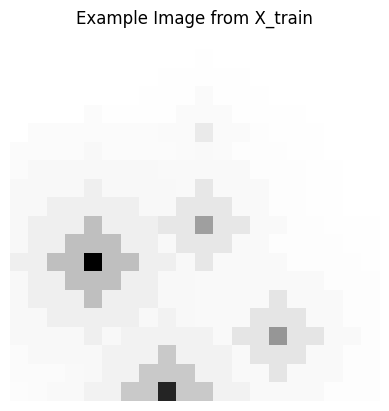

In [14]:
# Plot an example image (e.g., the first image in the array)
example_image = X_train_img[0]

# Convert the image from BGR (OpenCV default) to RGB for correct color display
example_image_rgb = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(example_image_rgb)
plt.title("Example Image from X_train")
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()

In [ ]:
X_train_img = X_train_img/255
X_val_img = X_val_img/255
X_test_img = X_test_img/255

array([[0.20644543, 0.47058824, 0.02964546, ..., 0.00271208, 0.54835282,
        0.22609562],
       [0.24754141, 0.7254902 , 0.02222307, ..., 0.00399872, 0.15409139,
        0.59063745],
       [0.10024689, 0.19607843, 0.02829631, ..., 0.00648854, 0.50371945,
        0.38446215],
       ...,
       [0.17650101, 0.52941176, 0.03410419, ..., 0.00382682, 0.58767269,
        0.30876494],
       [0.11241914, 0.47058824, 0.0261949 , ..., 0.00476   , 0.37832094,
        0.47709163],
       [0.10537096, 0.88235294, 0.03266477, ..., 0.0047482 , 0.17321998,
        0.61752988]])

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

Now we can start the CNN+MLP training. Before that we prepare the algorithm for reading data.

---
<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. FFNN for tabular data</font>

This is an example of a simple and more complex FFNN for tabular data. Note that we are not looking for the optimization of the CNN+MLP but to show an example of TINTOlib execution.

In [30]:
dropout = 0.1

In [31]:
# Single branch FFNN
ff_inputs = Input(shape = (attributes,))

mlp_1 = Dense(64, activation='relu')(ff_inputs)
mlp_1 = Dense(32, activation='relu')(mlp_1)
mlp_1 = Dense(16, activation='relu')(mlp_1)
ff_model = Model(inputs = ff_inputs, outputs = mlp_1)

In [18]:
# Two branch FFNN

ff_inputs = Input(shape = (attributes,))

# * START BRANCH 1
mlp_1 = Dense(1024, activation='relu')(ff_inputs)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(512, activation='relu')(ff_inputs)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(256, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(128, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(64, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(32, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(16, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

# * START BRANCH 2
mlp_2 = Dense(1024, activation='relu')(ff_inputs)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(512, activation='relu')(ff_inputs)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(256, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(128, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(64, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(32, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(16, activation='relu')(mlp_2)
mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

merged_tabular = Concatenate(axis=1)([mlp_1, mlp_2])

ff_model = Model(inputs = ff_inputs, outputs = merged_tabular)

---
<a id="section52"></a>
# <font color="#004D7F" size=5> 5.2. CNN for TINTOlib images</font>

This is an example of a simple and more complex CNN for TINTOlib images. Note that we are not looking for the optimization of the CNN+MLP but to show an example of TINTOlib execution.

In [32]:
dropout = 0.1

In [33]:
# Single branch CNN
#Input
input_shape = Input(shape=imgs_shape)

# CNN branch 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = Activation('relu')(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = Activation('relu')(tower_1)

#Flatten
merged = Flatten()(tower_1)

#Dense layers
out = Dense(128, activation='relu')(merged)
out = Dense(64, activation='relu')(out)
out = Dense(32, activation='relu')(out)

cnn_model = Model(input_shape, out)

In [21]:
#Input
input_shape = Input(shape=imgs_shape)

# CNN branch 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

#CNN branch 2
tower_2 = Conv2D(16, (5,5), activation='relu',padding="same")(input_shape)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

tower_2 = Conv2D(32, (5,5), activation='relu',padding="same")(tower_2)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

tower_2 = Conv2D(64, (5,5), activation='relu',padding="same")(tower_2)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

tower_2 = Conv2D(64, (5,5), activation='relu',padding="same")(tower_2)
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

#Concatenate CNN branches
merged = Concatenate(axis=1)([tower_1, tower_2])

#Flatten
merged = Flatten()(merged)

#Dense layers
out = Dense(512, activation='relu')(merged)
out = Dropout(dropout)(merged)
out = Dense(256, activation='relu')(merged)
out = Dropout(dropout)(merged)
out = Dense(128, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(64, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(32, activation='sigmoid')(out)
out = Dropout(dropout)(out)

cnn_model = Model(input_shape, out)

---
<a id="section53"></a>
# <font color="#004D7F" size=5> 5.3. Concatenate branches</font>

Finally, we need to fuse the CNN and MLP branches. In this case, we use a direct concatenation of the output from the CNN branch with the output from the MLP branch, feeding them into a final fully connected neural network (FFNN) that will produce the predictions.

In [34]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(48, activation="relu")(combinedInput)
x = Dense(24, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

In [23]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(64, activation="relu")(combinedInput)
x = Dense(32, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

---
<a id="section54"></a>
# <font color="#004D7F" size=5> 5.4. Metrics</font>

Define metrics and some hyperparameters

In [35]:
import tensorflow.keras.backend as K

def r_square(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - SS_res / (SS_tot + K.epsilon())
    return r2

METRICS = [
    tf.keras.metrics.MeanSquaredError(name = 'mse'),
    tf.keras.metrics.MeanAbsoluteError(name = 'mae'),
    tf.keras.metrics.RootMeanSquaredError(name = 'rmse'),
    r_square,
]

Print the hybrid model

In [36]:
os.makedirs(results_folder, exist_ok=True)

# Redirect the summary output to the specified file
with open(results_folder+"/model_summary.txt", "w") as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Desactivar la visualización automática de matplotlib
plt.ioff()
# Now, you can also save the model plot
plot_model(model, to_file=results_folder+'model_plot.png', show_shapes=True, expand_nested=True)
# Reactivar la visualización automática de matplotlib (opcional)
plt.ion()

---
<a id="section55"></a>
# <font color="#004D7F" size=5> 5.5. Compile and fit</font>


In [37]:
opt = Adam(learning_rate=1e-3)

In [38]:
model.compile(
    loss="mse",
    optimizer=opt,
    metrics = METRICS
)

In [39]:
# Configure EarlyStopping for binary classification
early_stopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation accuracy
    min_delta=0.001,         # Minimum change in the monitored quantity to qualify as an improvement
    patience=20,             # Number of epochs with no improvement after which training will be stopped
    verbose=1,               # Log when training stops
    mode='min',              # Maximize the accuracy; min the loss
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [40]:
model_history=model.fit(
    x=[X_train_num, X_train_img], y=y_train,
    validation_data=([X_val_num, X_val_img], y_val),
    epochs=10,
    batch_size=32,
    callbacks = [early_stopper]
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 30.6771 - mae: 2.0677 - mse: 30.6771 - r_square: -21.1934 - rmse: 4.5022 - val_loss: 0.5920 - val_mae: 0.5821 - val_mse: 0.5920 - val_r_square: 0.5114 - val_rmse: 0.7694
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5963 - mae: 0.5740 - mse: 0.5963 - r_square: 0.5142 - rmse: 0.7721 - val_loss: 0.5369 - val_mae: 0.5300 - val_mse: 0.5369 - val_r_square: 0.5618 - val_rmse: 0.7327
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5334 - mae: 0.5344 - mse: 0.5334 - r_square: 0.5659 - rmse: 0.7302 - val_loss: 0.5542 - val_mae: 0.5020 - val_mse: 0.5542 - val_r_square: 0.5467 - val_rmse: 0.7445
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4903 - mae: 0.5062 - mse: 0.4903 - r_square: 0.6022 - rmse: 0.7001 - val_loss: 0.4740 - val_mae: 0.4780 - val_mse: 0.4740 - val_r_square: 0.6122 - val_rmse: 0.6885
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4723 - mae: 0.4945 - mse: 0.4

In [41]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'r_square', 'rmse', 'val_loss', 'val_mae', 'val_mse', 'val_r_square', 'val_rmse'])


<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

Finally, we can evaluate our hybrid model with the images created by TINTOlib in any of the ways represented below.

---
<a id="section61"></a>
# <font color="#004D7F" size=5> 6.1. Train/Validation representation</font>

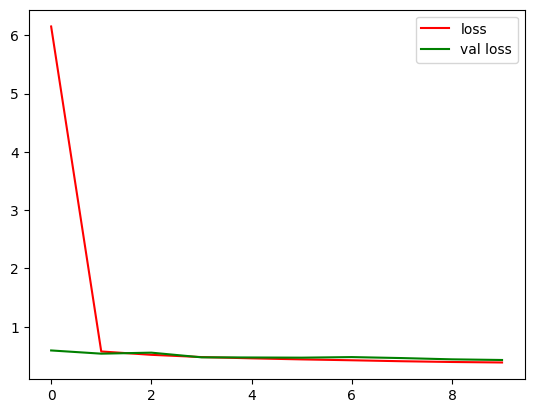

In [42]:
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.show()

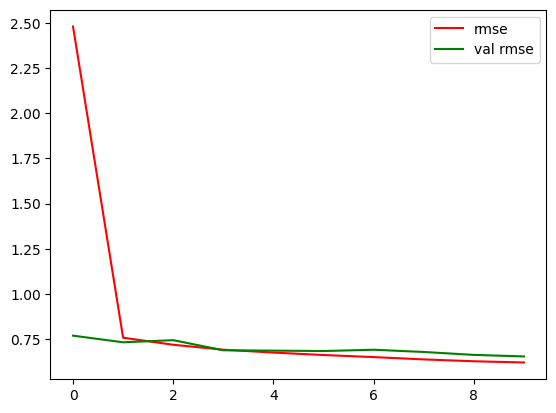

In [43]:
plt.plot(model_history.history['rmse'], color = 'red', label = 'rmse')
plt.plot(model_history.history['val_rmse'], color = 'green', label = 'val rmse')
plt.legend(loc = 'upper right')
plt.show()

---
<a id="section62"></a>
# <font color="#004D7F" size=5> 6.2. Validation/Test evaluation</font>

In [44]:
score_test= model.evaluate([X_val_num, X_val_img], y_val)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4423 - mae: 0.4286 - mse: 0.4423 - r_square: 0.6282 - rmse: 0.6640


In [45]:
prediction = model.predict([X_test_num,X_test_img])

test_mape = mean_absolute_percentage_error(y_test, prediction)
test_mae = mean_absolute_error(y_test, prediction)
test_mse = mean_squared_error(y_test, prediction)
test_rmse = mean_squared_error(y_test, prediction, squared=False)
test_r2 = r2_score(y_test, prediction)

# Print the evaluation metrics
print("Mean Absolute Percentage Error:", test_mape)
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("R2 Score:", test_r2)

# Define the metrics and their values
metrics = {
    "Mean Absolute Percentage Error": test_mape,
    "Mean Absolute Error": test_mae,
    "Mean Squared Error": test_mse,
    "Root Mean Squared Error": test_rmse,
    "R2 Score": test_r2,
}

# Save the metrics to a text file
with open(f"{results_folder}/metrics.txt", "w") as file:
    for metric, value in metrics.items():
        file.write(f"{metric}: {value}\n")

print(f"Metrics saved to {results_folder}/metrics.txt")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Absolute Percentage Error: 0.20935642134689966
Mean Absolute Error: 0.4229141135548159
Mean Squared Error: 0.4065094115692171
Root Mean Squared Error: 0.6375809059007469
R2 Score: 0.7098306174074271
Metrics saved to Results/Regression/california_housing_TINTO_blur_maximum/metrics.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
train_mse = model_history.history["mse"][-1]
train_r2 = model_history.history["r_square"][-1]

val_mse = model_history.history["val_mse"][-1]
val_r2 = model_history.history["val_r_square"][-1]

print("Train Mean Squared Error:", train_mse)
print("Train R2 Score:", train_r2)

print("Val Mean Squared Error:", val_mse)
print("Val R2 Score:", val_r2)

Train Mean Squared Error: 0.38563331961631775
Train R2 Score: 0.6910852789878845
Val Mean Squared Error: 0.4282904863357544
Val R2 Score: 0.6525911688804626


<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>